## Compare portfolio theories
Here we use shares price history to compare various portfolio allocation theories.
Main idea is to compare different ways to get portfolio:
  * Markovitz optimal portfolio (max Sharpie portfolio)
  * Using Ledoit Wolf caovariance shrinkage
  * Minimal volatility portfolio
  * Market capitalization-weighted portfolio
  * Hierarchical Risk Parity

import necessary libs

In [1]:
import numpy as np
import tqdm
import pandas as pd
import datetime
import importlib

In [2]:
from pypoanal import portfolio_calculators
from pypoanal import dataloader
from pypoanal import backtester

Use plotly backend for drawing charts

In [3]:
%matplotlib widget
pd.options.plotting.backend = "plotly"

## Load the data

Randomly select 50 tickers from ``info/shares_outstanding.csv`` file

In [4]:
tickers_list = np.array(dataloader.load_random_saved_tickers(sample_size=400))
tickers_list

array(['MSD', 'NFE', 'IGMS', 'SIX', 'ITIC', 'OLPX', 'REED', 'VAQC',
       'EXAI', 'ENOB', 'MACK', 'SIVB', 'JACK', 'RBB', 'NBIX', 'TANNZ',
       'TIL', 'VLO', 'SOTK', 'PAYO', 'LTCH', 'BBBY', 'SGRP', 'WSFS',
       'BSRR', 'HSIC', 'PFO', 'EPIX', 'IMRA', 'BDSX', 'STC', 'BDC',
       'DTST', 'NOAH', 'WAB', 'PTPI', 'SNDL', 'EWTX', 'CCTS', 'MLAB',
       'SCPH', 'OGE', 'HQH', 'HCSG', 'RXT', 'FORA', 'SASR', 'CTT', 'TAC',
       'SAMG', 'NTZ', 'LYV', 'POLA', 'VMW', 'NKX', 'FCT', 'LUXA', 'RCEL',
       'TTC', 'MHD', 'MDRR', 'KT', 'LAX', 'TEKK', 'PUK', 'TANH', 'ERIC',
       'LEO', 'FATBB', 'TETC', 'IBM', 'SVNA', 'BMAQ', 'BBDO', 'VRTX',
       'PCTY', 'MSTR', 'REKR', 'LLNW', 'MMSI', 'CHDN', 'CVGI', 'CELZ',
       'ARMK', 'MPLX', 'LRMR', 'PEI', 'VOD', 'NAOV', 'MIC', 'SLMBP',
       'FORD', 'DMAC', 'MHI', 'FFBC', 'CDNS', 'FREE', 'FSV', 'BYRN',
       'LTRY', 'VIVO', 'SNPO', 'FEIM', 'BPT', 'APWC', 'GPRO', 'NTP',
       'PDS', 'SCHN', 'SPTN', 'IMGN', 'CRL', 'EDTX', 'ZLAB', 'MIND',
       'FCCO', '

Load price and volume history for selected tickers

In [5]:
shares_history = dataloader.load_shares_history(tickers_list)

Loading price and volume: 100%|█████████████████████████████████████████████████████████| 400/400 [00:58<00:00,  6.89it/s]


## Backtest Performance

Select various ways to create a portfolio from given shares

In [6]:
calculators = {
    # 'max_sharpe': portfolio_calculators.compute_sharpie_weights,
    'HRP': portfolio_calculators.compute_hrp_weights,
    # 'exp_cov': portfolio_calculators.compute_expcov_weights,
    # 'equal': portfolio_calculators.compute_equal_weights,
    'MCAP': portfolio_calculators.compute_mcap_weights,
    'ledoitw_cov': portfolio_calculators.compute_ledoitw_weights
}

We allocate portfolio according to one of the algorithms. Then, portfolio is rebalanced every **rebalance_period** days (e.g. annually).
As a result we get history of allocated portfolios, fees, and portfolio values is USD.
All of that is done in **compare_calculators_for_periodic_rebalance** method.
Here *backtesting* means testing the trategy back in time (using hitorical data). 

In [7]:
backtest_start_date = datetime.date(2006, 8, 8)
backtest_end_date = datetime.date(2021, 12, 12)
rebalance_period = datetime.timedelta(days=360)
rebalance_dates = backtester.compute_rebalance_dates(backtest_start_date,backtest_end_date,rebalance_period)
importlib.reload(backtester)

values_history_per_calc, fees_history_per_calc, portfolio_history_per_calc = backtester.compare_calculators_for_periodic_rebalance(calculators,
                                                                                                                  tickers_list,
                                                                                                                  10**4,
                                                                                                                  rebalance_dates,
                                                                                                                  shares_history=shares_history)

HRP


100%|█████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:13<00:00,  1.07it/s]


MCAP


100%|█████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:01<00:00,  8.05it/s]


ledoitw_cov


100%|█████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.01it/s]


How did the value of the annually rebalanced market-cap weighted portfolio value changed over time:

In [8]:
values_history_per_calc['MCAP'].head()

2006-08-08    10000.000000
2007-08-03     9999.791466
2008-07-28     9964.642112
2009-07-23     9695.177695
2010-07-18    10627.850134
Name: MCAP, dtype: float64

How did the rebalance fees of the annually rebalanced market-cap weighted portfolio value changed over time:

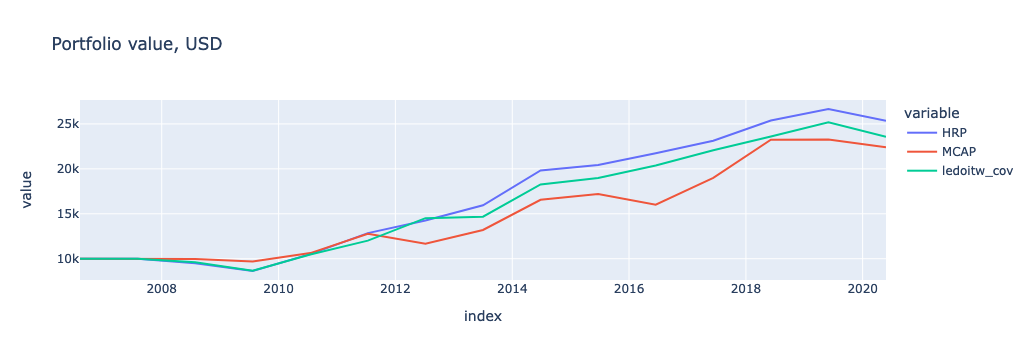

In [9]:
values_history_per_calc.plot(title=f'Portfolio value, USD')

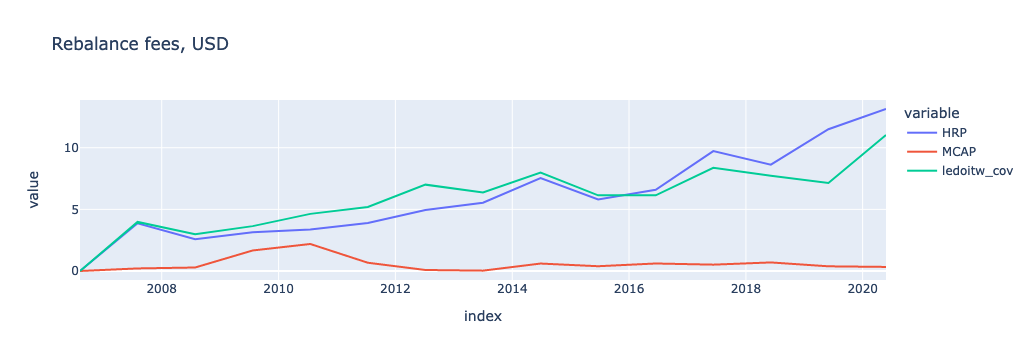

In [10]:
fees_history_per_calc.plot(title=f'Rebalance fees, USD')

##  Backtests varying start date
Now we can test how the date we start the backtest from affects the results

In [11]:
calculators = {
    # 'max_sharpe': portfolio_calculators.compute_sharpie_weights,
    'HRP': portfolio_calculators.compute_hrp_weights,
    # 'exp_cov': portfolio_calculators.compute_expcov_weights,
    # 'equal': portfolio_calculators.compute_equal_weights,
    'MCAP': portfolio_calculators.compute_mcap_weights,
    'ledoitw_cov': portfolio_calculators.compute_ledoitw_weights
}

In [12]:
from random import randint
importlib.reload(backtester)
backtest_start_date = datetime.date(2010, 8, 8)
backtest_end_date = datetime.date(2022, 2, 20)
rebalance_period = datetime.timedelta(days=360)
num_starting_dates = 40
initial_cash = 10 ** 7
start_days_delta = list(sorted(set(randint(-4*365, 4*365) for k in range(num_starting_dates))))
start_dates = [backtest_start_date+datetime.timedelta(days=days) for days in start_days_delta]
# start_dates = [datetime.date(2009,5,10)]
stats: dict[pd.DataFrame] = dict()
for calc_name, calculate_weights in calculators.items():
    start_to_end_values_df = pd.DataFrame()
    for start_date in tqdm.tqdm(start_dates,desc=calc_name,disable=False):
        rebalance_dates = backtester.compute_rebalance_dates(start_date,backtest_end_date,rebalance_period)
        portfolio_history, _ = backtester.reallocate_portfolio_periodically(calculate_weights,
                                                                            rebalance_dates,
                                                                            initial_cash,
                                                                            fees_percent=0.04,
                                                                            shares_history=shares_history,
                                                                            progress_bar=False)
        values_history: list[np.float64] = backtester.portfolios_values_history(list(zip(rebalance_dates,portfolio_history)),
                                                                                shares_history.price_history)
        values_history_dataframe = pd.DataFrame({str(start_date):values_history},index=rebalance_dates)
        start_to_end_values_df = start_to_end_values_df.join(values_history_dataframe,how='outer')
    stats[calc_name] = start_to_end_values_df

ledoitw_cov: 100%|████████████████████████████████████████████████████████████████████████| 40/40 [01:25<00:00,  2.14s/it]


In [13]:
stats.keys()

dict_keys(['HRP', 'MCAP', 'ledoitw_cov'])

stats is a dict of dataframes. Column of each dataframe correspond to start date, rows correspond to next reallocation date.

In [14]:
stats['ledoitw_cov'].head()

2006-12-03  2007-02-23  2007-03-14  2007-03-17  2007-08-13  \
2006-12-03  10000000.0         NaN         NaN         NaN         NaN   
2007-02-23         NaN  10000000.0         NaN         NaN         NaN   
2007-03-14         NaN         NaN  10000000.0         NaN         NaN   
2007-03-17         NaN         NaN         NaN  10000000.0         NaN   
2007-08-13         NaN         NaN         NaN         NaN  10000000.0   

            2007-12-03  2008-01-17  2008-06-09  2008-06-28  2008-09-14  ...  \
2006-12-03         NaN         NaN         NaN         NaN         NaN  ...   
2007-02-23         NaN         NaN         NaN         NaN         NaN  ...   
2007-03-14         NaN         NaN         NaN         NaN         NaN  ...   
2007-03-17         NaN         NaN         NaN         NaN         NaN  ...   
2007-08-13         NaN         NaN         NaN         NaN         NaN  ...   

            2011-12-03  2012-01-04  2012-05-19  2012-12-11  2013-04-16  \
2006-12-03         NaN         NaN         NaN         NaN         NaN   
2007-02-23         NaN         NaN         NaN         NaN         NaN   
2007-03-14         NaN         NaN         NaN         NaN         NaN   
2007-03-17         NaN         NaN         NaN         NaN         NaN   
2007-08-13         NaN         NaN         NaN         NaN         NaN   

            2013-09-11  2013-09-16  2014-01-24  2014-02-19  2014-02-25  
2006-12-03         NaN         NaN         NaN         NaN         NaN  
2007-02-23         NaN         NaN         NaN         NaN         NaN  
2007-03-14         NaN         NaN         NaN         NaN         NaN  
2007-03-17         NaN         NaN         NaN         NaN         NaN  
2007-08-13         NaN         NaN         NaN         NaN         NaN  

[5 rows x 40 columns]

Let's see the difference between MCAP and Ledoit Wolf min volatility. We normalize it by initial cash and consider % change

In [15]:
mcap_leddoit_diff = ((stats['ledoitw_cov']-stats['MCAP'])/initial_cash*100).interpolate()

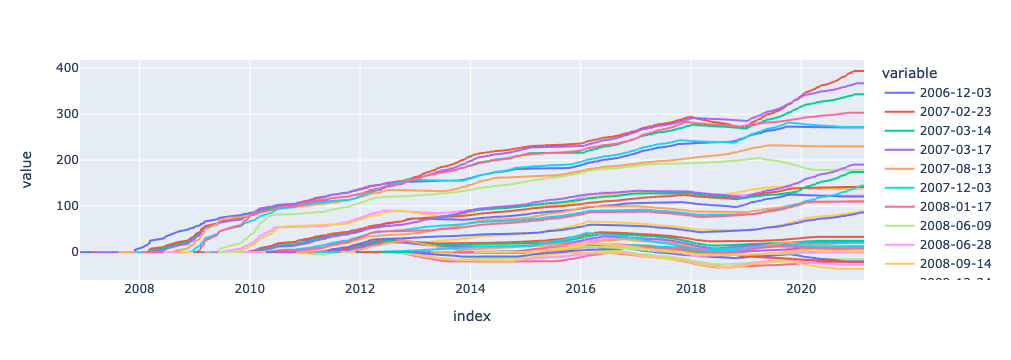

In [16]:
mcap_leddoit_diff.plot()

Comparing HRP results to marcet-cap weighted portfolios

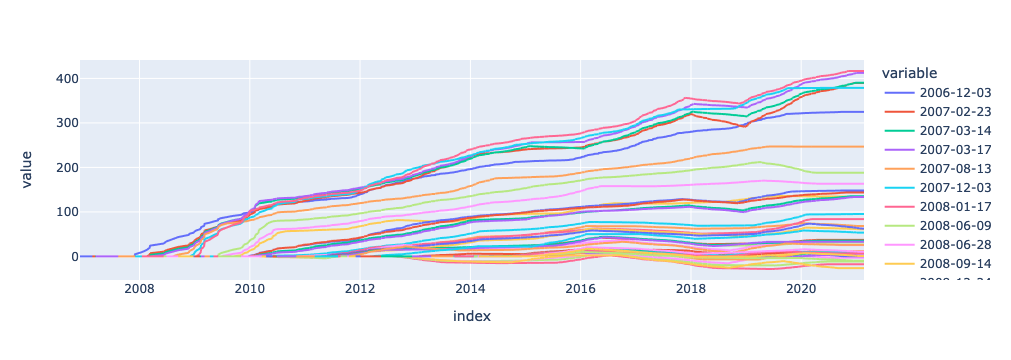

In [17]:
mcap_hrp_diff = ((stats['HRP']-stats['MCAP'])/initial_cash*100).interpolate()
mcap_hrp_diff.plot()

Note, that portolios bought before the 2008 financial crysis performed much better, yielding significantly higher returns.

Consider distribution of portfolio values compared to MCAP. Start date is randomized.

In [18]:
import plotly.express as px
mcap_diff = pd.DataFrame()
mcap_diff['ledoitw_cov'] = mcap_leddoit_diff.iloc[-1]
mcap_diff['HRP'] = mcap_hrp_diff.iloc[-1]

In [19]:
mcap_diff.describe()

ledoitw_cov         HRP
count    40.000000   40.000000
mean     95.772918  105.322951
std     120.702506  135.115645
min     -36.817662  -26.253284
25%       6.137735    8.419758
50%      28.773896   45.366658
75%     152.032135  144.841114
max     393.922020  416.654606

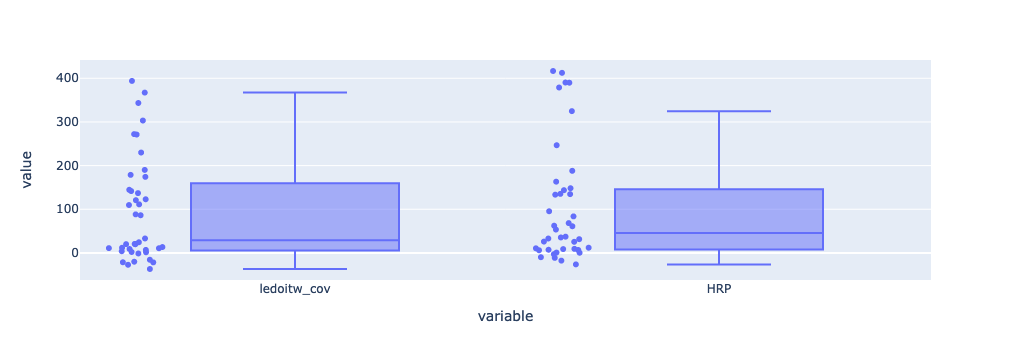

In [20]:
px.box(mcap_diff, y=['ledoitw_cov','HRP'], points='all')

both HRP and ledoit work better than MCAP-weighted portfolios. But which one works better?

Kolmogorov-Smirnov test for independent samples.

* $H_0$: equally distributed
* $H_1$: ledoit $<>$ HRP

Small $p$-values mean that we should probably reject $H_0$, and assume that min volatility portfolio using Ledoit Wolf convariance shrinkage is a better idea

In [23]:
import scipy.stats as st
st.ks_2samp(mcap_diff['ledoitw_cov'], mcap_diff['HRP'], alternative='two-sided')

KstestResult(statistic=0.15, pvalue=0.7659314523482239)

Result: HRP works almost the same as Ledoit-Wolf min volatility